In [7]:
# Name : Dhihan Ahmed, Luke Bianchi, Jacob Gurevich
# Assignment Number & Name : Naive Bayes - NHL Win Classification
# I pledge my honor that I have abided by the Stevens Honor System.

In [8]:
%pip install seaborn

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [10]:
# Load the dataset
df = pd.read_csv('merged_with_event_features.csv')

# Convert 'HoA' to binary
df['is_home'] = df['HoA'].map({'home': 1, 'away': 0})
df.drop(columns=['game_id', 'team_id'], inplace=True, errors='ignore')

# Feature list
features = [
    'shots', 'hits', 'pim', 'powerPlayGoals', 'faceOffWinPercentage',
    'giveaways', 'takeaways', 'blocked', 'avg_shot_x', 'avg_shot_y',
    'close_range', 'num_slap_shot', 'num_wrist_shot', 'won', 'num_backhand',
    'num_tip-in', 'is_home']

# Filter and clean data
df = df[features].dropna()
df['won'] = df['won'].astype(int)

# Train-test split
X = df.drop(columns='won')
y = df['won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train an SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [12]:
# Evaluate the SVM model
y_pred = svm.predict(X_test_scaled)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.6190571715145436
Confusion Matrix:
 [[1605  888]
 [1011 1481]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.63      2493
           1       0.63      0.59      0.61      2492

    accuracy                           0.62      4985
   macro avg       0.62      0.62      0.62      4985
weighted avg       0.62      0.62      0.62      4985



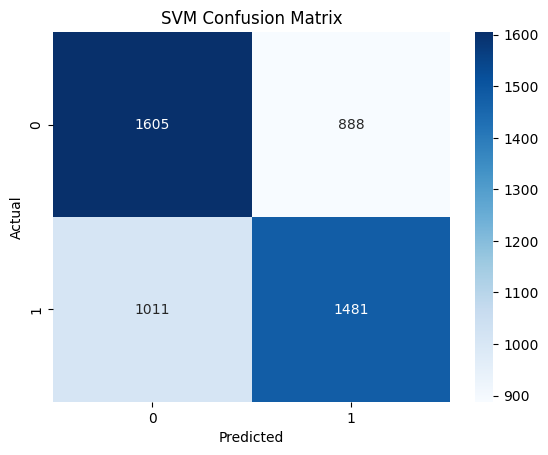

In [13]:
# Visualize confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()